# ICSS data processing for cohort01

**METADATA:**

|Sex    | ICSS+ShA | ICSS+LgA   |
|:-----:|:--------:|:----------:|
|Males  | SG17     | SG15       |
|-------|----------|------------|
|Females| SG14     | SG24, SG20 |
|-------|----------|------------|

**OUTLINE:**
1. Load data
2. Plot individual animals
    1. Pass 1-4
        1. Theta0
        2. M50
        3. MaxRate
    2. Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate
3. Plot groups
    1. Scatter and line plots: Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate
    2. Line plots: Mean +/- SEM of Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate

---

In [3]:
%load_ext rpy2.ipython

In [4]:
%%capture
%%R
library(tidyverse)
library(lubridate)

---

## 1. Load data

In [31]:
%%capture
%%R
# 1.2. Collating all the files into one tibble
# loading data: set the path to 
ICSS_dataDir <- "~/Dropbox (Partners HealthCare)/Projects/R01_2017_OxycSA-NASh-Glutamate/_data_R01_2017/_data_R01_2017_ICSS/_ana_files/Cohort01/"
ICSS_data <- read_csv(file.path(ICSS_dataDir, "_icssData_cohort01_raw_longform.csv"))
ICSS_normData <- read_csv(file.path(ICSS_dataDir, "_icssData_cohort01_normalized_longform.csv"))

In [32]:
%%R
ICSS_data %>% print

# A tibble: 908 x 7
   Date       Subject Experiment  Pass    T0   M50 MaxRate
   <date>     <chr>   <chr>      <dbl> <dbl> <dbl>   <dbl>
 1 2019-01-28 SG14    ShA-Female     1  25.3  52.8     190
 2 2019-01-28 SG14    ShA-Female     2  28.7  64.5     180
 3 2019-01-28 SG14    ShA-Female     3  47.8  59.2     181
 4 2019-01-28 SG14    ShA-Female     4  40.2  73.6     171
 5 2019-01-29 SG14    ShA-Female     1  37.1  59.3     176
 6 2019-01-29 SG14    ShA-Female     2  48.6  68.3     189
 7 2019-01-29 SG14    ShA-Female     3  47.0  56.3     162
 8 2019-01-29 SG14    ShA-Female     4  46.5  62.0     157
 9 2019-01-30 SG14    ShA-Female     1  36.8  51.9     169
10 2019-01-30 SG14    ShA-Female     2  49.5  67.8     182
# ... with 898 more rows


In [33]:
%%R
# 1.3. Assign data type to columns. 
# This gets broken when there are missing values
# Ideal data types
# Date   | Subject  | Experiment |   Pass   |  T0   |  M50  | MaxRate
# <date> | <factor> |  <factor>  | <factor> | <num> | <num> |  <num>

ICSS_data$Subject <- ICSS_data$Subject %>% as.factor
ICSS_data$Experiment <- ICSS_data$Experiment %>% as.factor
ICSS_data$Pass <- ICSS_data$Pass %>% as.factor
ICSS_data %>% print

# A tibble: 908 x 7
   Date       Subject Experiment Pass     T0   M50 MaxRate
   <date>     <fct>   <fct>      <fct> <dbl> <dbl>   <dbl>
 1 2019-01-28 SG14    ShA-Female 1      25.3  52.8     190
 2 2019-01-28 SG14    ShA-Female 2      28.7  64.5     180
 3 2019-01-28 SG14    ShA-Female 3      47.8  59.2     181
 4 2019-01-28 SG14    ShA-Female 4      40.2  73.6     171
 5 2019-01-29 SG14    ShA-Female 1      37.1  59.3     176
 6 2019-01-29 SG14    ShA-Female 2      48.6  68.3     189
 7 2019-01-29 SG14    ShA-Female 3      47.0  56.3     162
 8 2019-01-29 SG14    ShA-Female 4      46.5  62.0     157
 9 2019-01-30 SG14    ShA-Female 1      36.8  51.9     169
10 2019-01-30 SG14    ShA-Female 2      49.5  67.8     182
# ... with 898 more rows


In [34]:
%%R
ICSS_normData %>% print

# A tibble: 675 x 7
   Date       Subject Experiment  Pass norm.T0 norm.M50 norm.MaxRate
   <date>     <chr>   <chr>      <dbl>   <dbl>    <dbl>        <dbl>
 1 2019-01-17 SG15    LgA-Male       2   135.     122.          96.2
 2 2019-01-17 SG15    LgA-Male       3    97.9    113.          87.1
 3 2019-01-17 SG15    LgA-Male       4   143.      99.3         53.9
 4 2019-01-17 SG24    LgA-Female     2    28.5     52.6        125. 
 5 2019-01-17 SG24    LgA-Female     3    45.5     42.9        100. 
 6 2019-01-17 SG24    LgA-Female     4    23.5     84.0        105. 
 7 2019-01-18 SG15    LgA-Male       2   154.     101.          77.3
 8 2019-01-18 SG15    LgA-Male       3   147.     105.          77.3
 9 2019-01-18 SG15    LgA-Male       4   149.      96.9         27.3
10 2019-01-18 SG24    LgA-Female     2    25.8     36.0        138. 
# ... with 665 more rows


In [35]:
%%R
# 1.3. Assign data type to columns. 
# This gets broken when there are missing values
# Ideal data types
# Date   | Subject  | Experiment |   Pass   |  T0   |  M50  | MaxRate
# <date> | <factor> |  <factor>  | <factor> | <num> | <num> |  <num>
 
ICSS_normData$Subject <- ICSS_normData$Subject %>% as.factor
ICSS_normData$Experiment <- ICSS_normData$Experiment %>% as.factor
ICSS_normData$Pass <- ICSS_normData$Pass %>% as.factor
ICSS_normData %>% print

# A tibble: 675 x 7
   Date       Subject Experiment Pass  norm.T0 norm.M50 norm.MaxRate
   <date>     <fct>   <fct>      <fct>   <dbl>    <dbl>        <dbl>
 1 2019-01-17 SG15    LgA-Male   2       135.     122.          96.2
 2 2019-01-17 SG15    LgA-Male   3        97.9    113.          87.1
 3 2019-01-17 SG15    LgA-Male   4       143.      99.3         53.9
 4 2019-01-17 SG24    LgA-Female 2        28.5     52.6        125. 
 5 2019-01-17 SG24    LgA-Female 3        45.5     42.9        100. 
 6 2019-01-17 SG24    LgA-Female 4        23.5     84.0        105. 
 7 2019-01-18 SG15    LgA-Male   2       154.     101.          77.3
 8 2019-01-18 SG15    LgA-Male   3       147.     105.          77.3
 9 2019-01-18 SG15    LgA-Male   4       149.      96.9         27.3
10 2019-01-18 SG24    LgA-Female 2        25.8     36.0        138. 
# ... with 665 more rows


---

## 2. Plot individual animals
### 2.1. Pass 1-4 

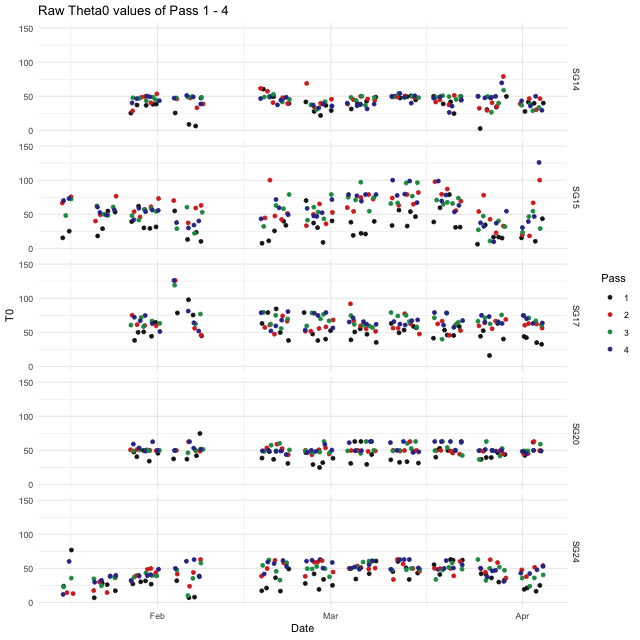

In [36]:
%%R -w 640 -h 640
# 1.3. Plotting raw values for T0, Pass 1 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% ggplot(aes(x = Date, y = T0)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw Theta0 values of Pass 1 - 4") + theme_minimal()

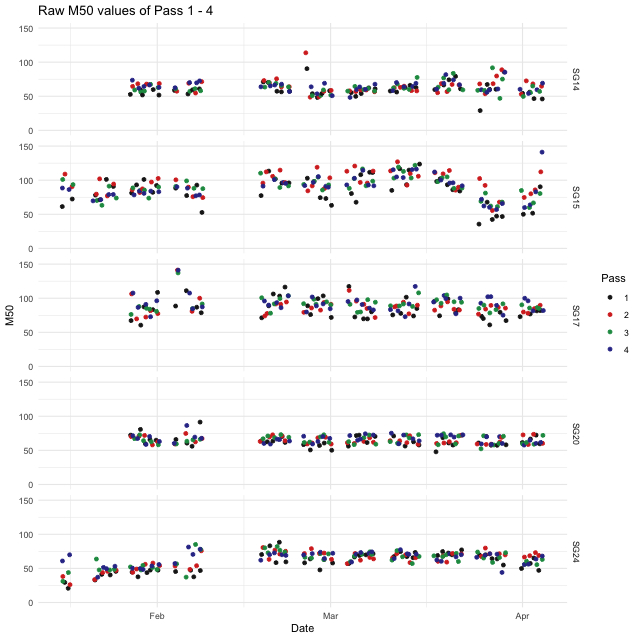

In [37]:
%%R -w 640 -h 640
# 1.3. Plotting raw values for M50, Pass 1 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% ggplot(aes(x = Date, y = M50)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw M50 values of Pass 1 - 4") + theme_minimal()

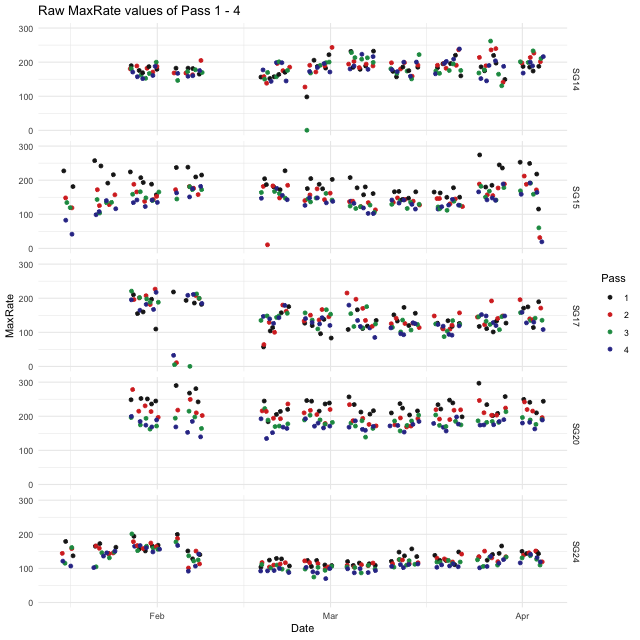

In [38]:
%%R -w 640 -h 640
# 1.3. Plotting raw values for MaxRate, Pass 1 - 4
lower_limit = 0
upper_limit = 300
ICSS_data %>% ggplot(aes(x = Date, y = MaxRate)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw MaxRate values of Pass 1 - 4") + theme_minimal()

### 2.2. Pass 2-4 

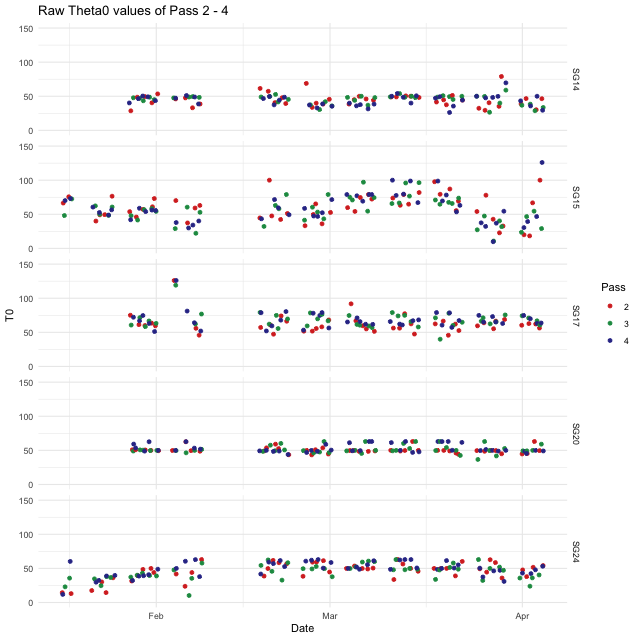

In [39]:
%%R -w 640 -h 640
# 1.3. Plotting raw values for T0, Pass 2 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = T0)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw Theta0 values of Pass 2 - 4") + theme_minimal()

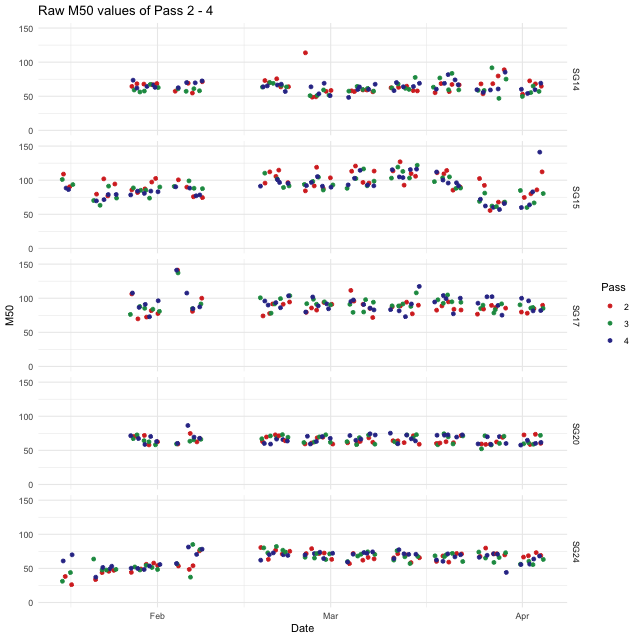

In [40]:
%%R -w 640 -h 640
# 1.3. Plotting raw values for M50, Pass 2 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = M50)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw M50 values of Pass 2 - 4") + theme_minimal()

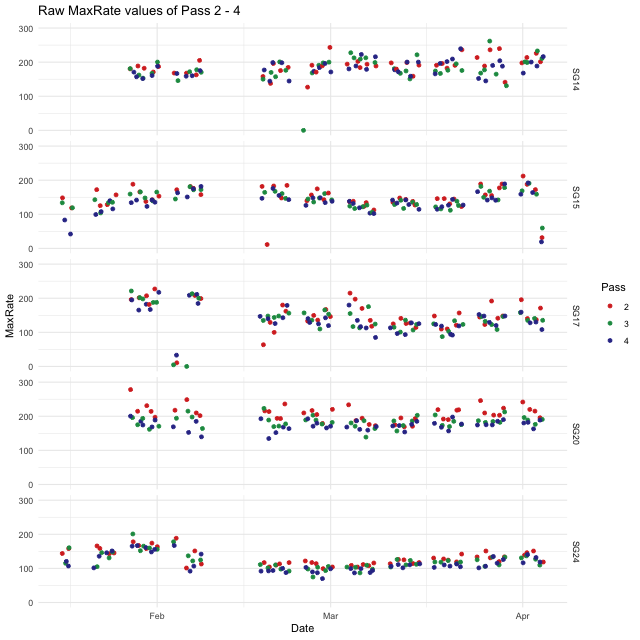

In [41]:
%%R -w 640 -h 640
# 1.3. Plotting raw values for MaxRate, Pass 2 - 4
lower_limit = 0
upper_limit = 300
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = MaxRate)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw MaxRate values of Pass 2 - 4") + theme_minimal()

---

## 3. Plot group-wise: percent baselines
### 3.1. Scatter and line plots

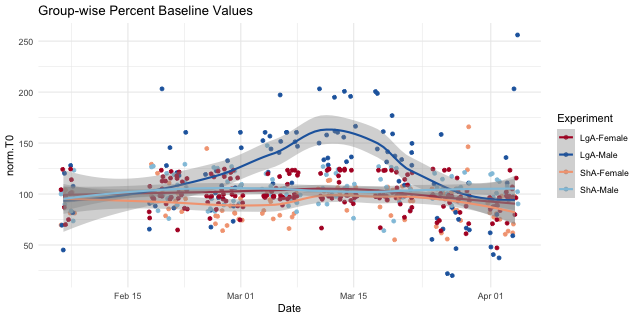

In [56]:
%%R -w 640 -h 320
# 1.3. plotting all passes
ICSS_normData %>% filter(Date >= "2019-02-07") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.T0, color = Experiment)) + 
geom_jitter() + geom_smooth(method = 'loess') +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ggtitle("Group-wise Percent Baseline Values") + 
theme_minimal()

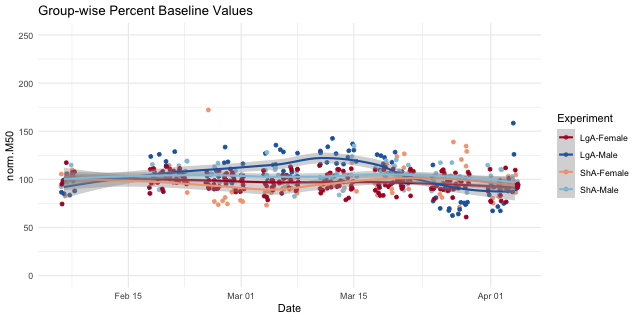

In [57]:
%%R -w 640 -h 320
# 1.3. plotting all the passes
ICSS_normData %>% filter(Date >= "2019-02-07") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.M50, color = Experiment)) + 
geom_jitter() + geom_smooth(method = 'loess') + 
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ylim(0, 250) + 
ggtitle("Group-wise Percent Baseline Values") + 
theme_minimal()

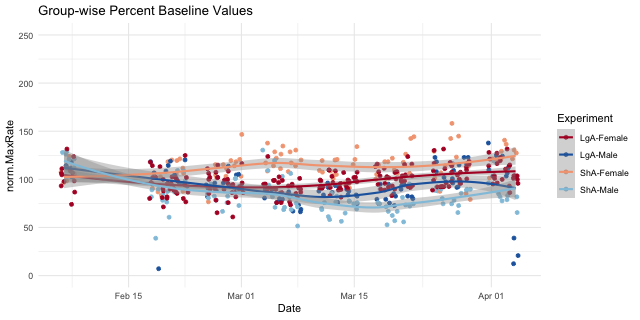

In [58]:
%%R -w 640 -h 320
# 1.3. plotting the means of all the passes
ICSS_normData %>% filter(Date >= "2019-02-07") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.MaxRate, color = Experiment)) + 
geom_jitter() + geom_smooth(method = 'loess') + 
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ylim(0, 250) + 
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()

### 3.2. Line plots: Mean +/- SEM of Pass 2-4

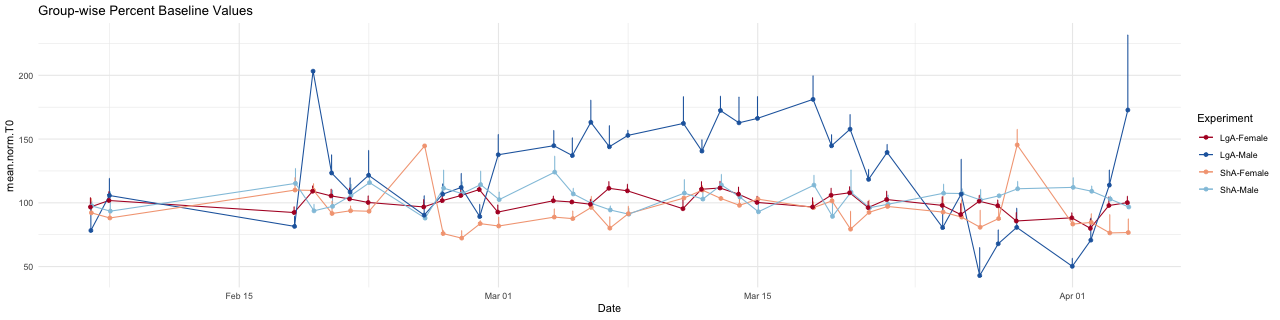

In [94]:
%%R -w 1280 -h 320
# 1.3. plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2019-02-07") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.T0, color = Experiment)) + 
geom_errorbar(aes(ymin=mean.norm.T0, ymax=mean.norm.T0+se.norm.T0), width=.1, position=position_dodge(0.1)) +
geom_line(position=position_dodge(0.1)) +
geom_point(position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()

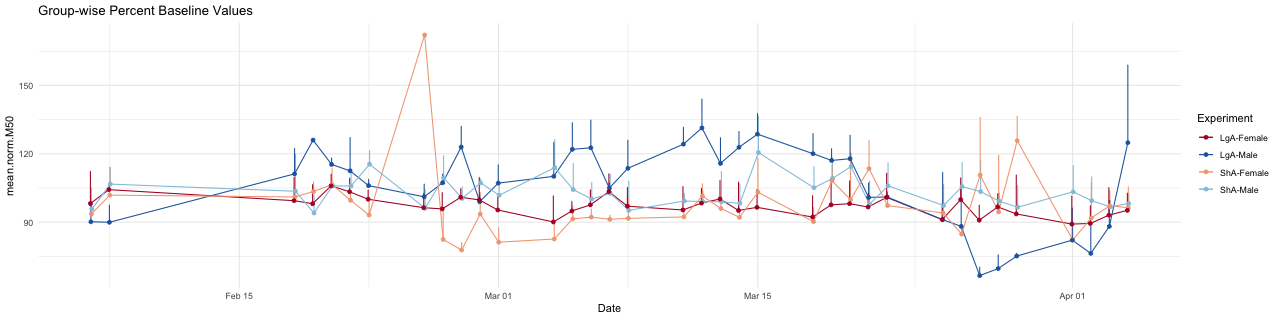

In [96]:
%%R -w 1280 -h 320
# 1.3. plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2019-02-07") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.M50, color = Experiment)) + 
geom_errorbar(aes(ymin=mean.norm.M50, ymax=mean.norm.M50+se.norm.M50), width=.1, position=position_dodge(0.1)) +
geom_line(position=position_dodge(0.1)) +
geom_point(position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()

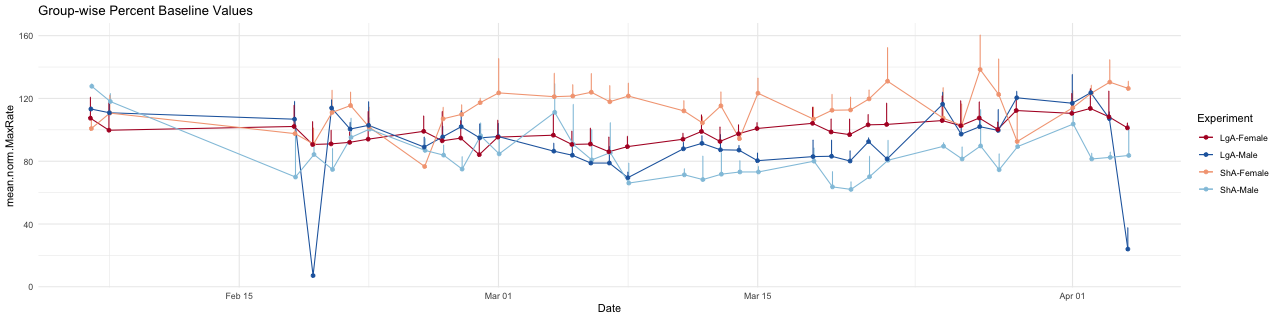

In [97]:
%%R -w 1280 -h 320
# 1.3. plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2019-02-07") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.MaxRate, color = Experiment)) + 
geom_errorbar(aes(ymin=mean.norm.MaxRate, ymax=mean.norm.MaxRate+se.norm.MaxRate), width=.1, position=position_dodge(0.1)) +
geom_line(position=position_dodge(0.1)) +
geom_point(position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()